In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
datasets = ['ITV_total_muestra_100.json', 'OPL_total_muestra_70.json', 'TVE_DTH_total_muestra_100.json']
dfs = pd.DataFrame()

for dataset in range(len(datasets)): 

    df = pd.read_json('Data/Extraction 2/' + datasets[dataset], lines = True)
    dfs = pd.concat([dfs, df], ignore_index=True)

cols_names = dfs.columns.str.split('\t')#.tolist()
cols_names = [col for cols_names in cols_names for col in cols_names]

dfs = dfs["global_op_id\tservice\tuser_id\tdevice_id\ttype\tdevice_type_used\tchannel_name\tprogram_name\tdate_time_start\tend_date_time\tduration\tduraciontotal_per_user"].str.split('\t', n=-1, expand=True)
dfs.columns = cols_names
dfs = dfs.rename(columns={'duraciontotal_per_user': 'total_duration_user'})
dfs.head()

,global_op_id,service,user_id,device_id,type,device_type_used,channel_name,program_name,date_time_start,end_date_time,duration,total_duration_user
0,CL,ITV,065817a8f198414182ab840a1f6cab4b9eced3d4f8d3c6...,9b30e1f7e4a5e4aee24a98875885b8a05611d1f75cded1...,live,tvLg_no-Accedo,MEGA,"AMAR PROFUNDO, LO MEJOR",2021-12-20T03:01:39.000Z,2021-12-20T03:51:39.000Z,3000,416502
1,CL,ITV,065817a8f198414182ab840a1f6cab4b9eced3d4f8d3c6...,9b30e1f7e4a5e4aee24a98875885b8a05611d1f75cded1...,live,tvLg_no-Accedo,NTV,Y TÚ ¿EN QUÉ TRABAJAS?,2021-12-20T19:40:40.000Z,2021-12-20T19:42:40.000Z,120,416502
2,CL,ITV,065817a8f198414182ab840a1f6cab4b9eced3d4f8d3c6...,9b30e1f7e4a5e4aee24a98875885b8a05611d1f75cded1...,live,tvLg_no-Accedo,MEGA,DULCE AMBICIÓN,2021-12-20T19:21:18.000Z,2021-12-20T19:41:18.000Z,1200,416502
3,CL,ITV,065817a8f198414182ab840a1f6cab4b9eced3d4f8d3c6...,9b30e1f7e4a5e4aee24a98875885b8a05611d1f75cded1...,live,tvLg_no-Accedo,MEGA,VERDADES OCULTAS,2021-12-20T18:30:45.000Z,2021-12-20T19:21:18.000Z,3033,416502
4,CL,ITV,065817a8f198414182ab840a1f6cab4b9eced3d4f8d3c6...,9b30e1f7e4a5e4aee24a98875885b8a05611d1f75cded1...,live,tvLg_no-Accedo,MEGA,EL TIEMPO,2021-12-20T18:26:45.000Z,2021-12-20T18:30:45.000Z,240,416502


In [87]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201740 entries, 0 to 201739
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   global_op_id         201740 non-null  object
 1   service              201740 non-null  object
 2   user_id              201740 non-null  object
 3   device_id            201740 non-null  object
 4   type                 201740 non-null  object
 5   device_type_used     201740 non-null  object
 6   channel_name         201740 non-null  object
 7   program_name         201740 non-null  object
 8   date_time_start      201171 non-null  object
 9   end_date_time        201171 non-null  object
 10  duration             201171 non-null  object
 11  total_duration_user  201171 non-null  object
dtypes: object(12)
memory usage: 18.5+ MB


In [88]:
# Drop rows that have NA values (569 rows)
dfs = dfs[~dfs.isna().any(axis=1)]

# Change to datetime and integer type
dfs = dfs.astype({"date_time_start":"datetime64", "end_date_time":"datetime64", 
                  "duration":"int","total_duration_user":"int"})

# Change datetime format
# dfs["date_time_start"] = dfs["date_time_start"].dt.strftime('%d/%m/%Y %H:%M:%S')
# dfs["end_date_time"] = dfs["end_date_time"].dt.strftime('%d/%m/%Y %H:%M:%S')

# Delete microseconds
dfs["date_time_start"] = dfs["date_time_start"].apply(lambda x: x.replace(microsecond=0))
dfs["end_date_time"] = dfs["end_date_time"].apply(lambda x: x.replace(microsecond=0))

# Convert from UTC Timezone to 
dfs["date_time_start"] = dfs["date_time_start"].dt.tz_localize('UTC').dt.tz_convert('Chile/Continental')
dfs["end_date_time"] = dfs["end_date_time"].dt.tz_localize('UTC').dt.tz_convert('Chile/Continental')

# Eliminate Timezone GMT-3 info from column
dfs["date_time_start"] = dfs["date_time_start"].dt.tz_localize(None)
dfs["end_date_time"] = dfs["end_date_time"].dt.tz_localize(None)

dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201171 entries, 0 to 201739
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   global_op_id         201171 non-null  object        
 1   service              201171 non-null  object        
 2   user_id              201171 non-null  object        
 3   device_id            201171 non-null  object        
 4   type                 201171 non-null  object        
 5   device_type_used     201171 non-null  object        
 6   channel_name         201171 non-null  object        
 7   program_name         201171 non-null  object        
 8   date_time_start      201171 non-null  datetime64[ns]
 9   end_date_time        201171 non-null  datetime64[ns]
 10  duration             201171 non-null  int32         
 11  total_duration_user  201171 non-null  int32         
dtypes: datetime64[ns](2), int32(2), object(8)
memory usage: 18.4+ MB


In [89]:
dfs.head()

,global_op_id,service,user_id,device_id,type,device_type_used,channel_name,program_name,date_time_start,end_date_time,duration,total_duration_user
0,CL,ITV,065817a8f198414182ab840a1f6cab4b9eced3d4f8d3c6...,9b30e1f7e4a5e4aee24a98875885b8a05611d1f75cded1...,live,tvLg_no-Accedo,MEGA,"AMAR PROFUNDO, LO MEJOR",2021-12-20 00:01:39,2021-12-20 00:51:39,3000,416502
1,CL,ITV,065817a8f198414182ab840a1f6cab4b9eced3d4f8d3c6...,9b30e1f7e4a5e4aee24a98875885b8a05611d1f75cded1...,live,tvLg_no-Accedo,NTV,Y TÚ ¿EN QUÉ TRABAJAS?,2021-12-20 16:40:40,2021-12-20 16:42:40,120,416502
2,CL,ITV,065817a8f198414182ab840a1f6cab4b9eced3d4f8d3c6...,9b30e1f7e4a5e4aee24a98875885b8a05611d1f75cded1...,live,tvLg_no-Accedo,MEGA,DULCE AMBICIÓN,2021-12-20 16:21:18,2021-12-20 16:41:18,1200,416502
3,CL,ITV,065817a8f198414182ab840a1f6cab4b9eced3d4f8d3c6...,9b30e1f7e4a5e4aee24a98875885b8a05611d1f75cded1...,live,tvLg_no-Accedo,MEGA,VERDADES OCULTAS,2021-12-20 15:30:45,2021-12-20 16:21:18,3033,416502
4,CL,ITV,065817a8f198414182ab840a1f6cab4b9eced3d4f8d3c6...,9b30e1f7e4a5e4aee24a98875885b8a05611d1f75cded1...,live,tvLg_no-Accedo,MEGA,EL TIEMPO,2021-12-20 15:26:45,2021-12-20 15:30:45,240,416502


In [90]:
# Drop global_op_id columns since all have the same value
df_tot = dfs.drop(['global_op_id'], axis=1)

In [91]:
# Make classification of device_type_used column values into more general classification
df_tot.loc[df_tot['device_type_used'].isin(['tvLg_no-Accedo', 'tvSamsung_2017+', 
                                            'tvAndroidTv', 'tvSamsung', 'tvLg', 
                                            'tvPanasonic', 'tvPhilips', 'tvSony']), 'device_type_used'] = 'TV'
df_tot.loc[df_tot['device_type_used'].isin(['stbHybridZapperCable', 'stbProteusCableUHD', 
                                            'stbProteusCableHD', 'stbHybridZapperCable1Gb', 
                                            'stbHybridPVRCable']), 'device_type_used'] = 'STB CATV'
df_tot.loc[df_tot['device_type_used'].isin(['sphAndroid', 'sphApple']), 'device_type_used'] = 'SMARTPHONE'
df_tot.loc[df_tot['device_type_used'].isin(['tabApple', 'tabAndroid', 'tabWin']), 'device_type_used'] = 'TABLET'
df_tot.loc[df_tot['device_type_used'].isin(['Chromecast']), 'device_type_used'] = 'STREAMER'
df_tot.loc[df_tot['device_type_used'].isin(['stbAndroidTv', 'FireTV']), 'device_type_used'] = 'STB OTT'
df_tot.loc[df_tot['device_type_used'].isin(['OpenIPTV_STB', 'Mediaroom']), 'device_type_used'] = 'STB IPTV'

df_tot.iloc[:,4].value_counts() # Show the number of instances of each device type used

TV            97640
STB IPTV      91087
SMARTPHONE     6856
PC             2416
STREAMER       1883
TABLET         1289
Name: device_type_used, dtype: int64

In [92]:
df_tot.iloc[:,3].value_counts() # Show the number of samples of vod vs live

live    198662
vod       2509
Name: type, dtype: int64

In [93]:
# Show interesting and general statistics about the integer valued columns
numerical_df = df_tot.iloc[:,-2:]
numerical_df.describe().applymap(lambda x: f"{x:0.0f}")

,duration,total_duration_user
count,201171,201171
mean,1338,1350704
std,1787,669952
min,2,358343
25%,120,749684
50%,542,1269892
75%,1800,1921640
max,46800,2811851


In [94]:
df_tot.iloc[:,7].head(5)

0   2021-12-20 00:01:39
1   2021-12-20 16:40:40
2   2021-12-20 16:21:18
3   2021-12-20 15:30:45
4   2021-12-20 15:26:45
Name: date_time_start, dtype: datetime64[ns]

In [95]:
df_tot.iloc[:,5].value_counts().head(15)

CHV                  26736
MEGA                 21646
TVN                  15254
CANAL 13              9685
MEGA HD               9379
CANAL 13 SPA          7364
TNT SPORTS HD         4470
ESPN HD               3895
MEGA / MEGA HD        3680
LA RED                2563
NA                    2509
DISCOVERY KIDS HD     2486
TV+                   2209
TNT SPORTS 3 HD       2083
24 HORAS HD           1919
Name: channel_name, dtype: int64

In [96]:
df_tot.iloc[:,6].value_counts().head(15)

POBRE NOVIO               4886
EL TIEMPO                 4689
CONTIGO EN LA MAÑANA      4659
MEGANOTICIAS PRIME        4431
CHV NOTICIAS CENTRAL      4365
MUCHO GUSTO               3501
CHV NOTICIAS TARDE        2923
24 HORAS CENTRAL          2546
TELETRECE                 2325
MEGANOTICIAS ACTUALIZA    2273
BUENOS DÍAS A TODOS       1938
FRANJA ELECTORAL          1927
TÚ DÍA                    1873
¿QUIÉN ES LA MÁSCARA?     1760
VERDADES OCULTAS          1507
Name: program_name, dtype: int64

In [97]:
df_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201171 entries, 0 to 201739
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   service              201171 non-null  object        
 1   user_id              201171 non-null  object        
 2   device_id            201171 non-null  object        
 3   type                 201171 non-null  object        
 4   device_type_used     201171 non-null  object        
 5   channel_name         201171 non-null  object        
 6   program_name         201171 non-null  object        
 7   date_time_start      201171 non-null  datetime64[ns]
 8   end_date_time        201171 non-null  datetime64[ns]
 9   duration             201171 non-null  int32         
 10  total_duration_user  201171 non-null  int32         
dtypes: datetime64[ns](2), int32(2), object(7)
memory usage: 16.9+ MB


In [98]:
df_tot.to_csv('Data/Extraction 2/Clean data.csv',index=False)

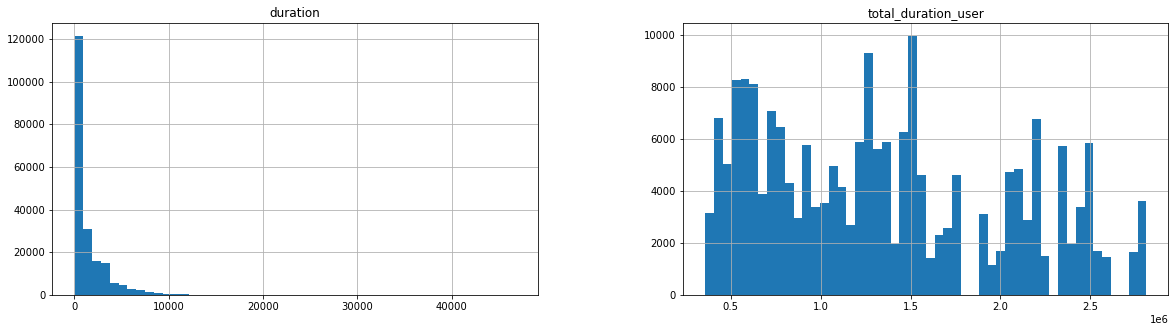

In [99]:
hist = df_tot.hist(column=['duration', 'total_duration_user'], bins=50, figsize=(20,5))

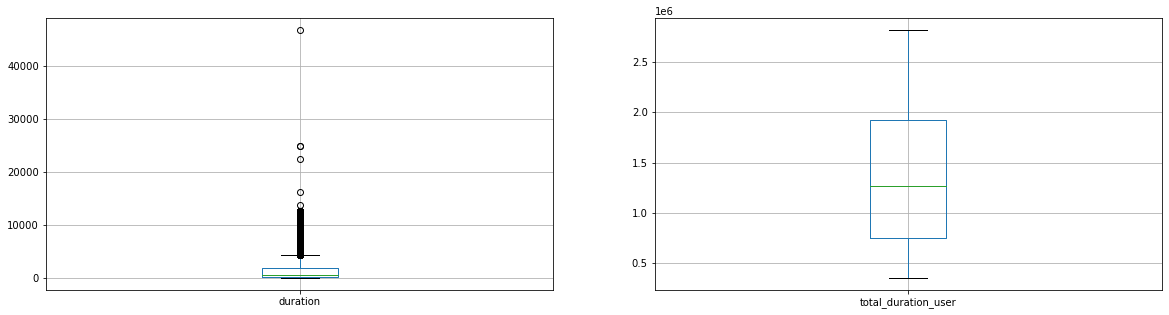

In [100]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
boxplot = df_tot.boxplot('duration', ax=ax[0])
boxplot = df_tot.boxplot('total_duration_user', ax=ax[1])

<ipython-input-101-e17b09516988>:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  item.hist(ax=ax[0])


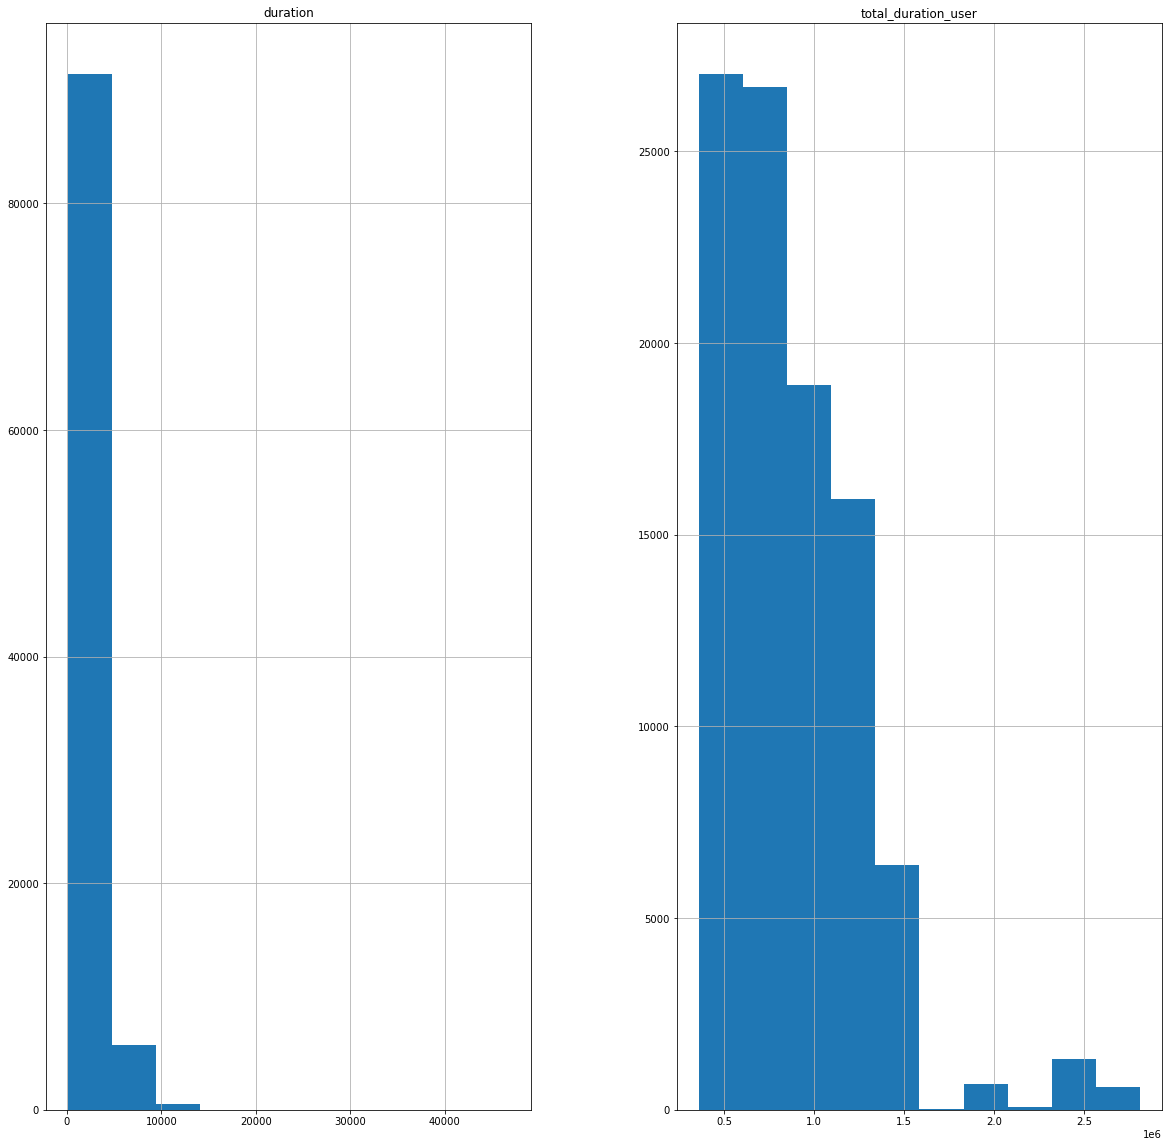

In [101]:
# hist_by = df_tot.hist(column='duration', by='device_type_used', bins=50, figsize=(20,20), sharex=True)
# hist_by = df_tot.hist(column='total_duration_user', by='device_type_used', bins=50, figsize=(20,20), sharex=True)

fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20, 20))
# df_tot.hist(column='duration', by='device_type_used', bins=50, ax=ax[0], figsize=(20,20), sharex=True)
# df_tot.hist(column='total_duration_user', by='device_type_used', bins=50, ax=ax[1], figsize=(20,20), sharex=True)
# df_tot['total_duration_user'].hist(by='device_type_used', alpha=0.5)
df_group = df_tot.groupby('device_type_used')
i = 0
for key, item in df_group:
    if i < 3:
        item.hist(ax=ax[0])
    else:
        item.hist(ax=ax[1])

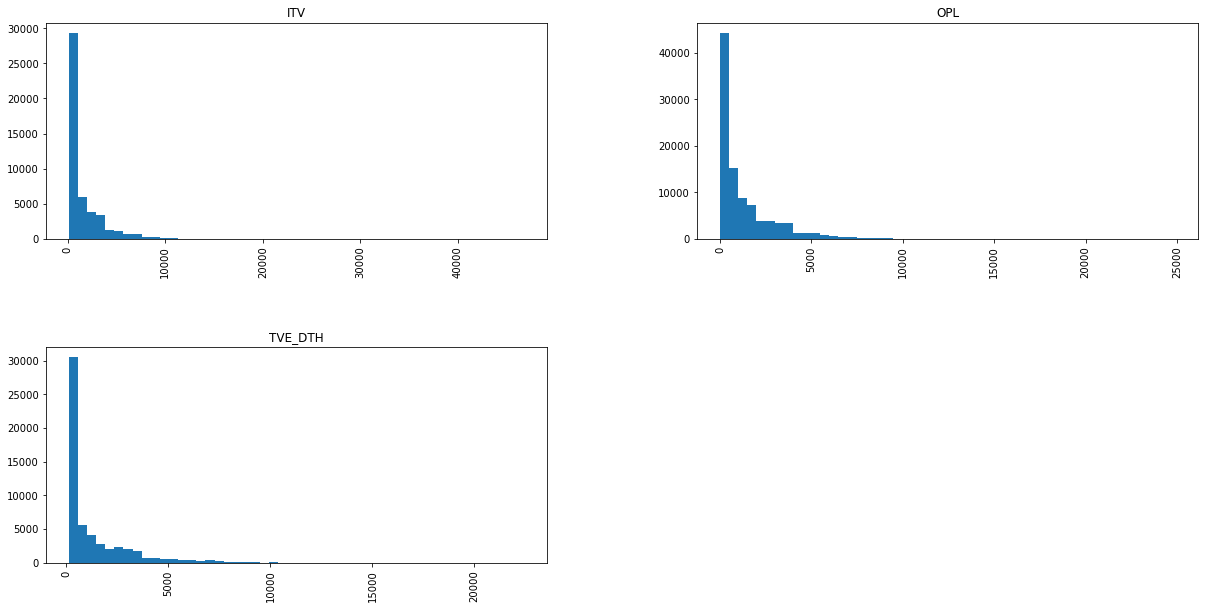

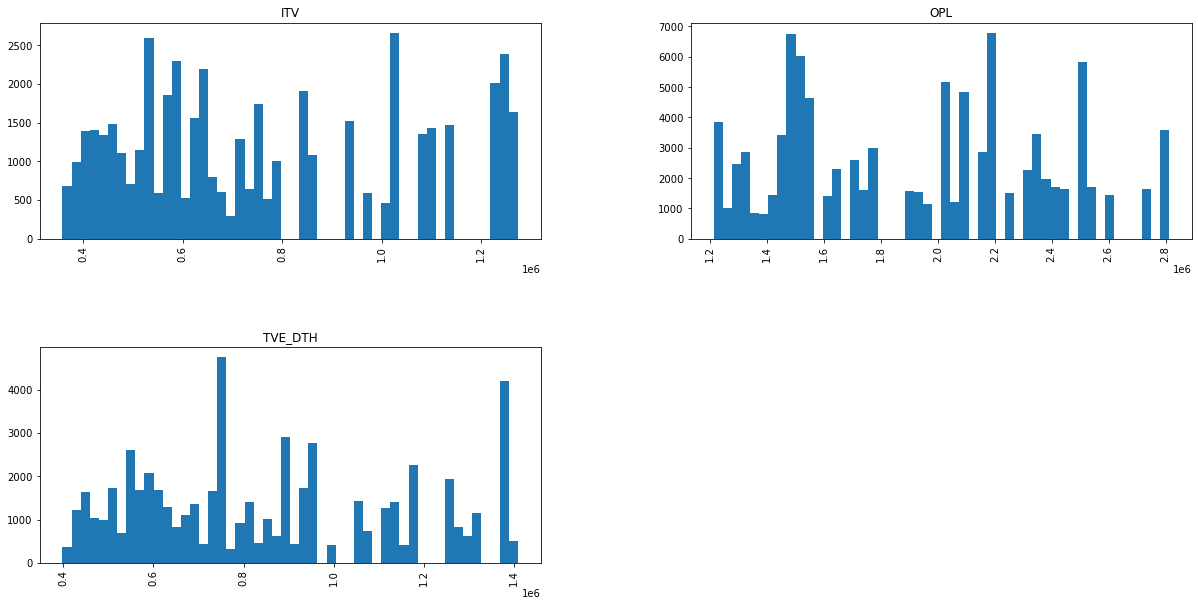

In [102]:
hist_by = df_tot.hist(column='duration', by='service', bins=50, figsize=(20,10))
hist_by = df_tot.hist(column='total_duration_user', by='service', bins=50, figsize=(20,10))